In [2]:
import pathlib
from pathlib import Path
from glob import glob
import pandas as pd
import plotly.graph_objects as go

In [3]:
path_main_usgs = Path("../../data-sets/usgs/splib07")
path_ascii_splib07a = path_main_usgs / "ASCIIdata/ASCIIdata_splib07a"
path_index_splib07a = path_main_usgs / "indexes" / "datatable_splib07a.html"

In [4]:
list_files = list(path_main_usgs.glob("*"))

list_files

[WindowsPath('../../data-sets/usgs/splib07/ASCIIdata'),
 WindowsPath('../../data-sets/usgs/splib07/DS1035.pdf'),
 WindowsPath('../../data-sets/usgs/splib07/GIFplots'),
 WindowsPath('../../data-sets/usgs/splib07/HTMLmetadata'),
 WindowsPath('../../data-sets/usgs/splib07/indexes'),
 WindowsPath('../../data-sets/usgs/splib07/README.html'),
 WindowsPath('../../data-sets/usgs/splib07/SPECPRsplib07'),
 WindowsPath('../../data-sets/usgs/splib07/USGS_Spectral_Library_Version_7_Data.xml'),
 WindowsPath('../../data-sets/usgs/splib07/USGS_Spectral_Library_Version_7_Data_XML.pdf'),
 WindowsPath('../../data-sets/usgs/splib07/usgs_splib07.zip')]

In [5]:
list_files = list(path_ascii_splib07a.glob("*"))
list_files

[WindowsPath('../../data-sets/usgs/splib07/ASCIIdata/ASCIIdata_splib07a/ChapterA_ArtificialMaterials'),
 WindowsPath('../../data-sets/usgs/splib07/ASCIIdata/ASCIIdata_splib07a/ChapterC_Coatings'),
 WindowsPath('../../data-sets/usgs/splib07/ASCIIdata/ASCIIdata_splib07a/ChapterL_Liquids'),
 WindowsPath('../../data-sets/usgs/splib07/ASCIIdata/ASCIIdata_splib07a/ChapterM_Minerals'),
 WindowsPath('../../data-sets/usgs/splib07/ASCIIdata/ASCIIdata_splib07a/ChapterO_OrganicCompounds'),
 WindowsPath('../../data-sets/usgs/splib07/ASCIIdata/ASCIIdata_splib07a/ChapterS_SoilsAndMixtures'),
 WindowsPath('../../data-sets/usgs/splib07/ASCIIdata/ASCIIdata_splib07a/ChapterV_Vegetation'),
 WindowsPath('../../data-sets/usgs/splib07/ASCIIdata/ASCIIdata_splib07a/errorbars'),
 WindowsPath('../../data-sets/usgs/splib07/ASCIIdata/ASCIIdata_splib07a/splib07a_Bandpass_(FWHM)_ASDFR_StandardResolution.txt'),
 WindowsPath('../../data-sets/usgs/splib07/ASCIIdata/ASCIIdata_splib07a/splib07a_Bandpass_(FWHM)_ASDHR_High

In [6]:
chapter_name = "ChapterM_Minerals"
material_name = "Actinolite HS116.2B"

path_ascii_chapter = path_ascii_splib07a / chapter_name

In [7]:
list_df_splib07a = pd.read_html(path_index_splib07a, extract_links="body")
len(list_df_splib07a)

8

In [8]:
df_minerals = list_df_splib07a[1].copy().droplevel(0, axis=1).droplevel(0, axis=1)
df_minerals = df_minerals.loc[:, ~df_minerals.columns.str.contains("Unnamed")]
df_minerals[["Material Name", "x"]] = pd.DataFrame(
    df_minerals["Spectrum Title"].tolist(),
    index=df_minerals.index
)

df_minerals.drop(columns=["Spectrum Title", "x"], inplace=True)
df_minerals.rename(columns={"Material Name": "Spectrum Title"}, inplace=True)
df_minerals.set_index("Spectrum Title", inplace=True)
df_minerals.head(3)

,HTML Description,ASCII Spectrum (µm),ASCII Spectrum Error Bars (µm),ASCII Wavelengths (µm),ASCII Bandpass (µm),Full Range Plot,Range 1 Plot: 0.2-1.0 microns,Range 2 Plot: 0.2-2.5 microns,Range 3 Plot: 1.5-5.5 microns,Range 4 Plot: 2.5-25 microns,Range 5 Plot: 4000-50 inverse centimeters,GIF Wavelengths (µm) Plot,GIF Bandpass (µm) Plot
Spectrum Title,,,,,,,,,,,,,
Acmite NMNH133746 Pyroxene BECKa AREF,"(Description, ../HTMLmetadata/Acmite_NMNH13374...","(Spectrum Data, ../ASCIIdata/ASCIIdata_splib07...","(Spectrum Error Bars Data, ../ASCIIdata/ASCIId...","(Wavelengths Data, ../ASCIIdata/ASCIIdata_spli...","(Bandpass Data, ../ASCIIdata/ASCIIdata_splib07...","(full plot, ../GIFplots/GIFplots_splib07a/Chap...","(0.2-1.0µm Plot, ../GIFplots/GIFplots_splib07a...","(0.2-2.5µm Plot, ../GIFplots/GIFplots_splib07a...","(1.5-5.5µm Plot, ../GIFplots/GIFplots_splib07a...","(, None)","(, None)","(Wavelengths Plot, ../GIFplots/GIFplots_splib0...","(Bandpass Plot, ../GIFplots/GIFplots_splib07a/..."
Actinolite HS116.1B ASDFRb AREF,"(Description, ../HTMLmetadata/Actinolite_HS116...","(Spectrum Data, ../ASCIIdata/ASCIIdata_splib07...","(, None)","(Wavelengths Data, ../ASCIIdata/ASCIIdata_spli...","(Bandpass Data, ../ASCIIdata/ASCIIdata_splib07...","(full plot, ../GIFplots/GIFplots_splib07a/Chap...","(0.2-1.0µm Plot, ../GIFplots/GIFplots_splib07a...","(0.2-2.5µm Plot, ../GIFplots/GIFplots_splib07a...","(1.5-5.5µm Plot, ../GIFplots/GIFplots_splib07a...","(, None)","(, None)","(Wavelengths Plot, ../GIFplots/GIFplots_splib0...","(Bandpass Plot, ../GIFplots/GIFplots_splib07a/..."
Actinolite HS116.2B ASDFRb AREF,"(Description, ../HTMLmetadata/Actinolite_HS116...","(Spectrum Data, ../ASCIIdata/ASCIIdata_splib07...","(, None)","(Wavelengths Data, ../ASCIIdata/ASCIIdata_spli...","(Bandpass Data, ../ASCIIdata/ASCIIdata_splib07...","(full plot, ../GIFplots/GIFplots_splib07a/Chap...","(0.2-1.0µm Plot, ../GIFplots/GIFplots_splib07a...","(0.2-2.5µm Plot, ../GIFplots/GIFplots_splib07a...","(1.5-5.5µm Plot, ../GIFplots/GIFplots_splib07a...","(, None)","(, None)","(Wavelengths Plot, ../GIFplots/GIFplots_splib0...","(Bandpass Plot, ../GIFplots/GIFplots_splib07a/..."


In [9]:
df_material = df_minerals[df_minerals.index.str.contains(material_name)]
df_material

,HTML Description,ASCII Spectrum (µm),ASCII Spectrum Error Bars (µm),ASCII Wavelengths (µm),ASCII Bandpass (µm),Full Range Plot,Range 1 Plot: 0.2-1.0 microns,Range 2 Plot: 0.2-2.5 microns,Range 3 Plot: 1.5-5.5 microns,Range 4 Plot: 2.5-25 microns,Range 5 Plot: 4000-50 inverse centimeters,GIF Wavelengths (µm) Plot,GIF Bandpass (µm) Plot
Spectrum Title,,,,,,,,,,,,,
Actinolite HS116.2B ASDFRb AREF,"(Description, ../HTMLmetadata/Actinolite_HS116...","(Spectrum Data, ../ASCIIdata/ASCIIdata_splib07...","(, None)","(Wavelengths Data, ../ASCIIdata/ASCIIdata_spli...","(Bandpass Data, ../ASCIIdata/ASCIIdata_splib07...","(full plot, ../GIFplots/GIFplots_splib07a/Chap...","(0.2-1.0µm Plot, ../GIFplots/GIFplots_splib07a...","(0.2-2.5µm Plot, ../GIFplots/GIFplots_splib07a...","(1.5-5.5µm Plot, ../GIFplots/GIFplots_splib07a...","(, None)","(, None)","(Wavelengths Plot, ../GIFplots/GIFplots_splib0...","(Bandpass Plot, ../GIFplots/GIFplots_splib07a/..."


In [20]:
path_from_html_ascii_wavelengths = df_material.iloc[0]["ASCII Wavelengths (µm)"][1][3:]
path_from_html_ascii_spectrum = df_material.iloc[0]["ASCII Spectrum (µm)"][1][3:]

print(path_from_html_ascii_wavelengths)
print(path_from_html_ascii_spectrum)

ASCIIdata/ASCIIdata_splib07a/splib07a_Wavelengths_ASD_0.35-2.5_microns_2151_ch.txt
ASCIIdata/ASCIIdata_splib07a/ChapterM_Minerals/splib07a_Actinolite_HS116.2B_ASDFRb_AREF.txt


In [22]:
path_from_html_ascii_wavelengths = Path(df_material.iloc[0]["ASCII Wavelengths (µm)"][1][3:])
path_ascii_wavelengths = path_main_usgs / path_from_html_ascii_wavelengths
print(path_ascii_wavelengths)

path_from_html_ascii_spectrum = Path(df_material.iloc[0]["ASCII Spectrum (µm)"][1][3:])
path_ascii_spectrum = path_main_usgs / path_from_html_ascii_spectrum
print(path_ascii_spectrum)

..\..\data-sets\usgs\splib07\ASCIIdata\ASCIIdata_splib07a\splib07a_Wavelengths_ASD_0.35-2.5_microns_2151_ch.txt
..\..\data-sets\usgs\splib07\ASCIIdata\ASCIIdata_splib07a\ChapterM_Minerals\splib07a_Actinolite_HS116.2B_ASDFRb_AREF.txt


In [23]:
df_ascii_wavelengths = pd.read_csv(path_ascii_wavelengths)
information_wavelengths = df_ascii_wavelengths.columns[0]
df_ascii_wavelengths.columns = ["wavelength (micron)"]
df_ascii_wavelengths

,wavelength (micron)
0,0.350
1,0.351
2,0.352
3,0.353
4,0.354
...,...
2146,2.496
2147,2.497
2148,2.498
2149,2.499


In [201]:
df_ascii_spectrum = pd.read_csv(path_ascii_spectrum)
information_spectrum = df_ascii_spectrum.columns[0]
df_ascii_spectrum.columns = ["value"]
df_ascii_spectrum

,value
0,0.201405
1,0.200531
2,0.201326
3,0.204206
4,0.205481
...,...
2146,0.578435
2147,0.578613
2148,0.579116
2149,0.579760


In [202]:
print(information_wavelengths)
print(information_spectrum)

 splib07a Record=23: Wavelengths ASD 0.35-2.5 microns 2151 ch
 splib07a Record=114: Actinolite HS116.2B          ASDFRb AREF


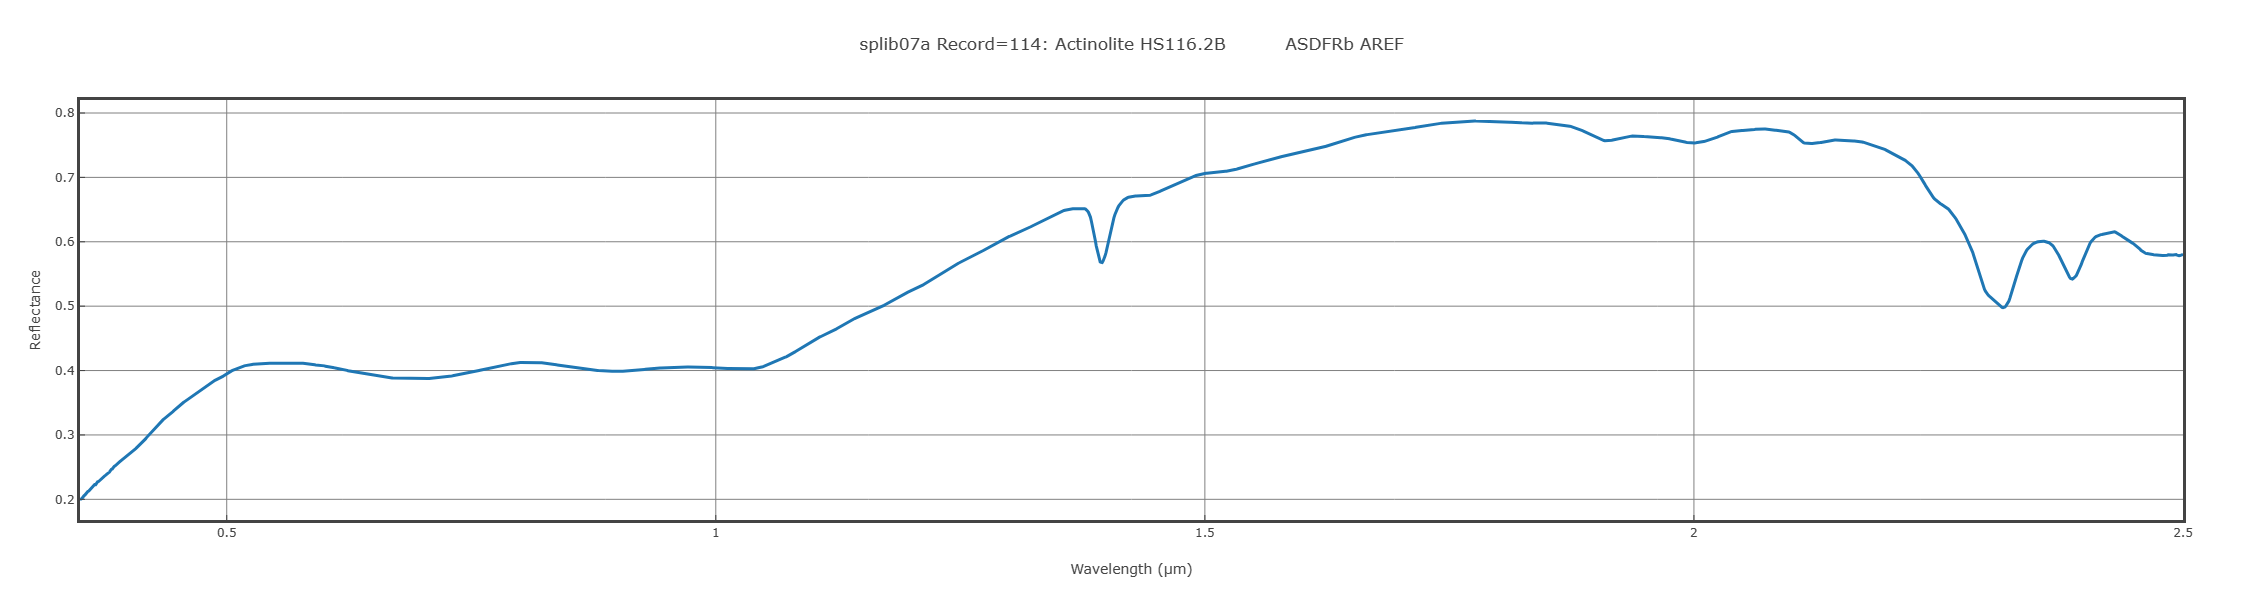

In [203]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_ascii_wavelengths["wavelength (micron)"],
        y=df_ascii_spectrum["value"],
        name=information_spectrum,
        line=dict(
            width=3
        )
    )
)

fig.update_layout(
    title=f"{information_spectrum}",
    xaxis=dict(
        title="Wavelength (µm)",
        linewidth=3,
        showline=True,
        ticks="inside",
        mirror=True,
        gridcolor="gray",
        gridwidth=1,
        showgrid=True
    ),
    yaxis=dict(
        title="Reflectance",
        linewidth=3,
        showline=True,
        ticks="inside",
        mirror=True,
        gridcolor="gray",
        gridwidth=1,
        showgrid=True
    ),
    width=1000,
    height=600,
    template="none"
)

fig.show()